In [3]:
# 观察albumentations工具提供的图像增强效果
import matplotlib.pyplot as plt
import albumentations as A
import numpy as np
import cv2
from datasets import *
data = load_image(['C0'])
image = data['image']
label = data['label']

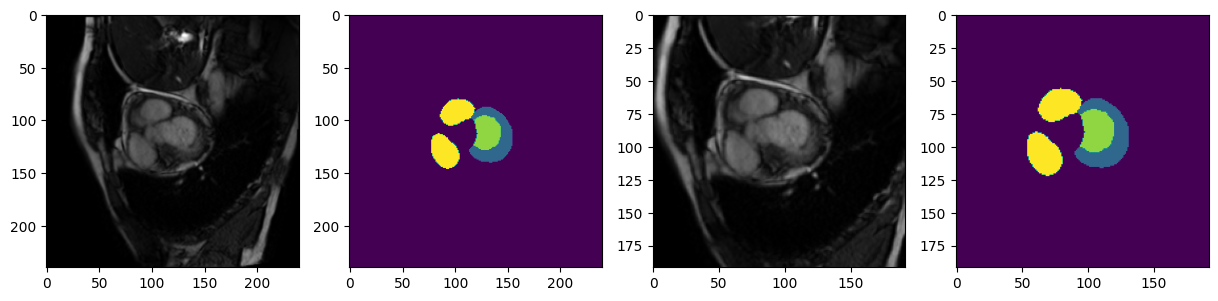

In [11]:
train_transforms = A.Compose([
            #A.Resize(512,512,interpolation=cv2.INTER_LINEAR),
            A.CenterCrop(height=192,width=192),
            #A.ShiftScaleRotate(),
            #A.ElasticTransform(alpha=200,sigma=100,alpha_affine=35,p=1),
            #A.RandomRotate90(),
            #A.VerticalFlip(),
            #A.Transpose(),
            #A.OpticalDistortion(p=1,distort_limit=2, shift_limit=0.5),
            #A.GridDistortion(p=1),
            #A.RandomBrightnessContrast(p=1),
            #A.RandomGamma(gamma_limit=(70,100),p=1),
            #A.OpticalDistortion(p=1, distort_limit=1, shift_limit=0.5)
        ])
index = 100
re = train_transforms(image=image[index],mask=label[index])
ipro = re['image']
mpro = re['mask']
plt.figure(figsize=(15,10))
plt.subplot(1,4,1)
plt.imshow(image[index],cmap='gray')
plt.subplot(1,4,2)
plt.imshow(label[index])
plt.subplot(1,4,3)
plt.imshow(ipro,cmap='gray')
plt.subplot(1,4,4)
plt.imshow(mpro,)

In [1]:
from utils import drawhistogram
drawhistogram(image[index])
drawhistogram(ipro)

/home/lucar/anaconda3/envs/d2l/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


NameError: name 'image' is not defined

In [ ]:
def truncate(self, MRI):
        # truncate
        Hist, _ = np.histogram(MRI, bins=int(MRI.max()))

        idexs = np.argwhere(Hist >= 20)
        idex_min = np.float32(0)
        idex_max = np.float32(idexs[-1, 0])

        # MRI[np.where(MRI <= idex_min)] = idex_min
        MRI[np.where(MRI >= idex_max)] = idex_max
        # MRI = MRI - (idex_max+idex_min)/2
        # MRI = MRI / ((idex_max-idex_min)/2)

        # norm
        sig = MRI[0, 0, 0]
        MRI = np.where(MRI != sig, MRI - np.mean(MRI[MRI != sig]), 0 * MRI)
        MRI = np.where(MRI != sig, MRI /
                       np.std(MRI[MRI != sig] + 1e-7), 0 * MRI)
        return MRI